In [1]:
!pip install tensorflow 

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
import os
os.sys.path

['C:\\Users\\pante',
 'C:\\Users\\pante\\anaconda3\\python37.zip',
 'C:\\Users\\pante\\anaconda3\\DLLs',
 'C:\\Users\\pante\\anaconda3\\lib',
 'C:\\Users\\pante\\anaconda3',
 '',
 'C:\\Users\\pante\\anaconda3\\lib\\site-packages',
 'C:\\Users\\pante\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\pante\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\pante\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\pante\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\pante\\.ipython']

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras==2.3.1

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, 
    Dropout, 
    Flatten, 
    Conv2D, 
    MaxPooling2D, 
    MaxPool2D,
    GlobalMaxPooling2D,
    BatchNormalization
)
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


Using TensorFlow backend.


In [7]:
Imgz = np.load('images.npy')

In [8]:
Imgz.shape

(4750, 128, 128, 3)

In [9]:
Labels = pd.read_csv('Labels.csv')

In [10]:
Labels.shape

(4750, 1)

In [11]:
Labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [12]:
#Normalization
Imgz = Imgz.astype('float32')
Imgz /= 255


In [13]:
# split dataset

# Step#1: Split train and test set
X_train, X_test, y_train, y_test = train_test_split(Imgz, Labels, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3325, 128, 128, 3), (1425, 128, 128, 3))

In [14]:
# Step#2: Split validation from test set
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_test.shape, X_validation.shape

((712, 128, 128, 3), (713, 128, 128, 3))

In [15]:
# one hot encoding
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
y_validation = encoder.fit_transform(y_validation)

In [16]:
# Display target variable
y_train[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
# Gaussaian Blurring
for idx, img in enumerate(X_train):
  X_train[idx] = cv2.GaussianBlur(img, (5, 5), 0)

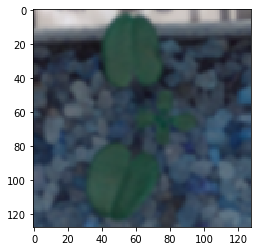

In [18]:
plt.imshow(X_train[0], cmap='gray')

In [19]:
# Gaussian Blur to Test and Validation sets
for idx, img in enumerate(X_test):
  X_test[idx] = cv2.GaussianBlur(img, (5, 5), 0)

for idx, img in enumerate(X_validation):
  X_validation[idx] = cv2.GaussianBlur(img, (5, 5), 0)

In [20]:
print(y_train[0])

[0 0 1 0 0 0 0 0 0 0 0 0]


In [21]:
# Set the CNN model

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [22]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [23]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [24]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [25]:
x_train = X_train.astype('float32') # Conversion to float type from integer type.
x_test = X_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)

In [40]:
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)

print(x_train.shape)
print(x_test.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)


In [44]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=30, batch_size=100, callbacks=[callbacks])



Train on 3325 samples, validate on 713 samples
Epoch 1/30
3325/3325 [==============================] - 201s 60ms/sample - loss: 2.2626 - accuracy: 0.2132 - val_loss: 2.6102 - val_accuracy: 0.0926
Epoch 2/30
3325/3325 [==============================] - 220s 66ms/sample - loss: 2.0558 - accuracy: 0.2896 - val_loss: 2.5121 - val_accuracy: 0.0757
Epoch 3/30
3325/3325 [==============================] - 249s 75ms/sample - loss: 1.9036 - accuracy: 0.3359 - val_loss: 2.3419 - val_accuracy: 0.2328
Epoch 4/30
3325/3325 [==============================] - 204s 61ms/sample - loss: 1.7422 - accuracy: 0.3841 - val_loss: 2.2467 - val_accuracy: 0.3170
Epoch 5/30
3325/3325 [==============================] - 205s 62ms/sample - loss: 1.6649 - accuracy: 0.4129 - val_loss: 2.2170 - val_accuracy: 0.2945
Epoch 6/30
3325/3325 [==============================] - 199s 60ms/sample - loss: 1.5867 - accuracy: 0.4502 - val_loss: 2.3542 - val_accuracy: 0.1557
Epoch 7/30
3325/3325 [==============================] - 194

In [46]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

712/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 2.5939804677213174
Test accuracy: 0.16011237


In [47]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

In [48]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

=== Confusion Matrix ===
[[17  0  0  0  0  0 23  0  1  0  0  0]
 [38  9  0  0  0  0  0  0  8  0  0  0]
 [48  0  0  0  1  0  0  0  0  0  0  0]
 [59  0  0 24  0  0  0  0  5  0  0  0]
 [24  0  0  0  8  0  0  1  0  0  0  0]
 [67  1  0  0  0  5  0  0  1  0  0  0]
 [41  0  0  0  0  0 58  0  2  0  0  0]
 [18  0  0  0  0  0  0 12  0  0  0  0]
 [14  0  0  0  0  0  0  0 60  0  0  0]
 [29  0  0  0  0  0  0  0 19  0  0  0]
 [71  0  0  0  0  0  0  0  1  0  0  0]
 [21  0  0  0  0  0  0  0 17  0  0  9]]


Predicted label: Black-grass


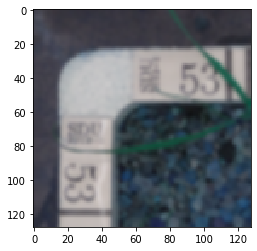

In [49]:
# visualization
y_pred = encoder.inverse_transform(y_pred)

index = 2
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Black-grass


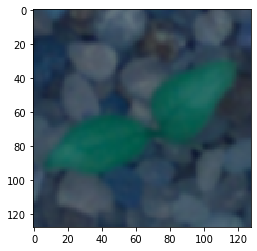

In [50]:
index = 3
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Black-grass


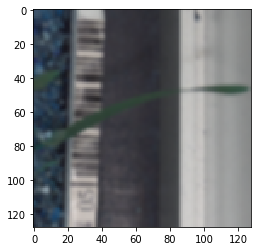

In [51]:
index = 33
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Black-grass


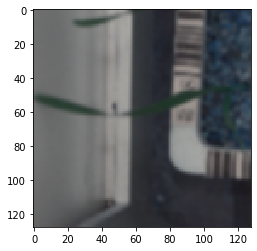

In [52]:
index = 36
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Black-grass


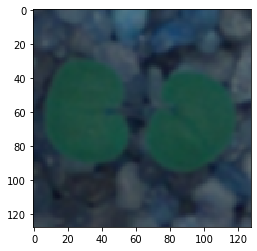

In [53]:
index = 59
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])